# PriorSampler Test

This notebook tests the `PriorSampler` class for generating uncertain parameter field. 

## Uncertain parameter and covariance operator
Consider an uncertain field $w$ on $\Omega = (0,1)^2$ with distribution $w \sim N(0, C)$, where $N(0,C)$ denotes the Gaussian normal distribution with the mean function being zero in $L^2(\Omega, \mathbb{R})$ and $C: L^2(\Omega; \mathbb{R}) \to L^2(\Omega; \mathbb{R})$ a covariance operator taking the form:
\begin{equation}
    C = \begin{cases}\tag{1}
        (-\mathsf{a} \nabla \mathsf{b} \cdot \nabla + \mathsf{c})^{-2}\,, \qquad & \text{in } \Omega\,,\\
        \mathsf{a} n \cdot \mathsf{b}\nabla \,, \qquad & \text{on }\partial \Omega\,,
    \end{cases}
\end{equation}
with $\mathsf{a}, \mathsf{c}$ being the parameters of a covariance operator, $\mathsf{b} = \mathsf{b}(x)$ a diffusivity function in the covariance operator, and $n$ unit outward normal. For example, the values of various parameters are
\begin{equation}\tag{1}
\mathsf{a} = 0.01\,, \quad \mathsf{c} = 1\,, \quad \mathsf{b} = 1\,.
\end{equation}

In [4]:
import sys
import os
import time
import numpy as np
import dolfin as dl

src_path = "../src/"
sys.path.append(src_path + 'plotting')
from field_plot import field_plot, quick_field_plot

sys.path.append(src_path + 'pde')
sys.path.append(src_path + 'prior')
from priorSampler import PriorSampler

from fenicsUtilities import function_to_vertex

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

# set seed
seed = 0
np.random.seed(seed)

In [5]:
data_folder = 'test_prior_sampler/'
current_directory = os.getcwd()  
results_dir = current_directory + '/' + data_folder
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Create PriorSampler model

a = 0.005, c = 0.2


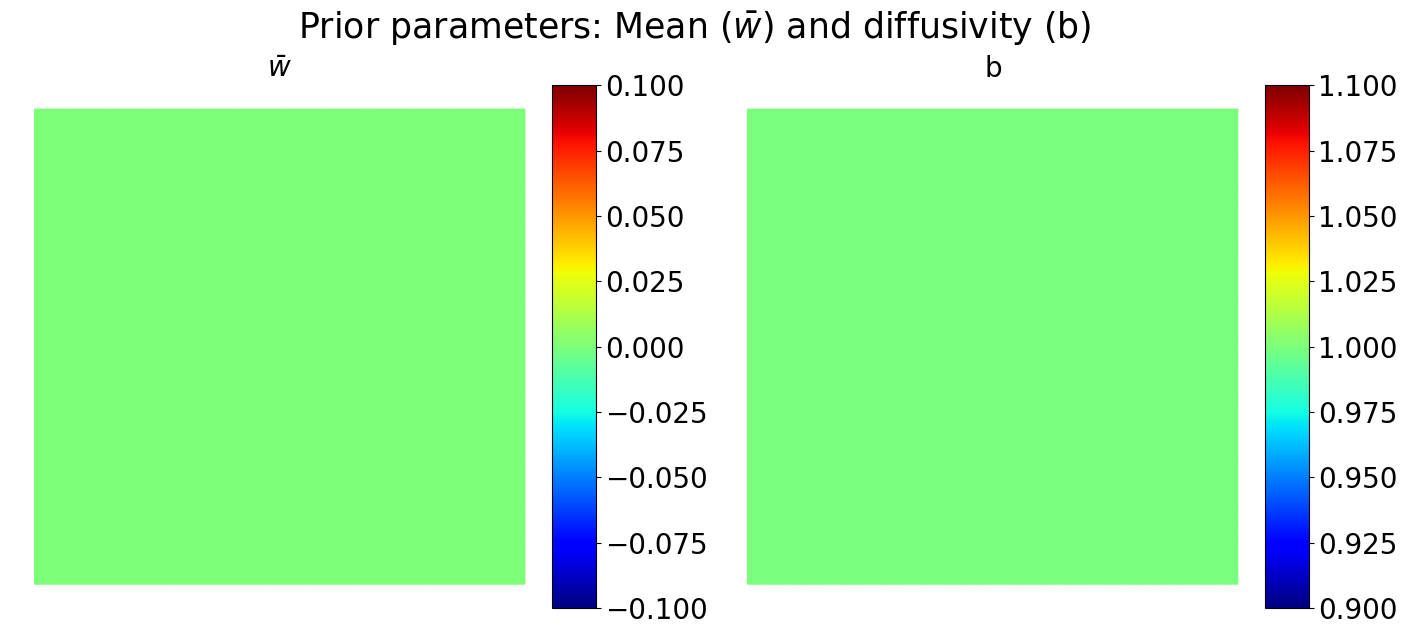

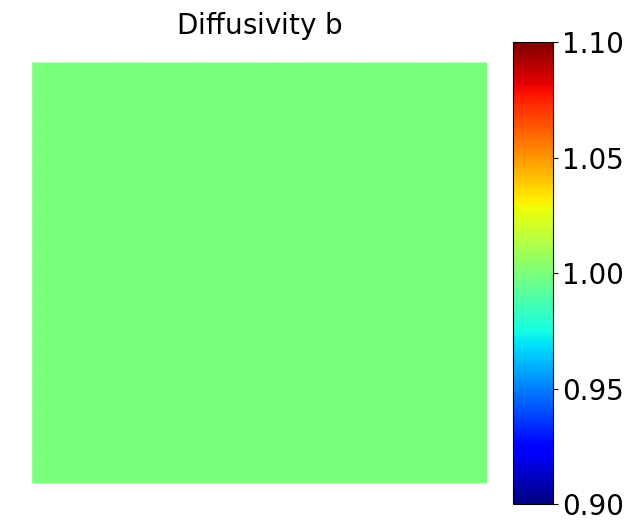

In [6]:
prior_ac = 0.005
prior_cc = 0.2
fe_order = 1
nx, ny = 50, 50

# create mesh
mesh = dl.UnitSquareMesh(nx, ny)
V = dl.FunctionSpace(mesh, "Lagrange", fe_order)

# create prior sampler
prior_sampler = PriorSampler(V, prior_ac, prior_cc)

print('a = {}, c = {}'.format(prior_sampler.a.values()[0], prior_sampler.c.values()[0]))

fs = 20
rows, cols = 1, 2
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))
axs = np.array([axs]) if rows == 1 else axs
stats = []
m = prior_sampler.empty_sample()

for i in range(rows):
    for j in range(cols):
        
        m = prior_sampler.mean if j == 0 else function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical')

        axs[i,j].set_title(r'$\bar{w}$' if j == 0 else r'$\mathsf{b}$', fontsize=fs)
        axs[i,j].axis('off')

fig.tight_layout()
fig.suptitle(r'Prior parameters: Mean ($\bar{w}$) and diffusivity ($\mathsf{b}$)', fontsize=1.25*fs, y = 1.05)
plt.savefig(results_dir + 'const_b_prior_parameters.png',  bbox_inches='tight')
plt.show()

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), prior_sampler.V.mesh().coordinates(), title = r'Diffusivity $\mathsf{b}$', cmap ='jet', figsize=(7, 6), fs = 20, savefilename=results_dir + 'const_b.png')

## Generate random samples and plot

Sample:  0, log_prior = -6.92e-01, min = -5.84e-01, max = 3.96e-01, mean = -1.25e-01, std = 1.95e-01
Sample:  1, log_prior = -7.10e-01, min = -6.33e-01, max = 3.10e-01, mean = -6.64e-02, std = 1.80e-01
Sample:  2, log_prior = -6.98e-01, min = -3.29e-01, max = 4.20e-01, mean = -1.25e-02, std = 1.26e-01
Sample:  3, log_prior = -6.95e-01, min = -8.08e-01, max = 4.11e-01, mean = -1.71e-01, std = 2.79e-01
Sample:  4, log_prior = -7.06e-01, min = -7.65e-01, max = 3.32e-01, mean = -9.64e-02, std = 2.16e-01
Sample:  5, log_prior = -6.92e-01, min = -2.68e-01, max = 5.73e-01, mean = 1.29e-01, std = 1.57e-01
Sample:  6, log_prior = -6.99e-01, min = -3.03e-01, max = 6.50e-01, mean = 1.03e-01, std = 2.12e-01
Sample:  7, log_prior = -7.10e-01, min = -4.57e-01, max = 4.93e-01, mean = 1.03e-01, std = 1.62e-01
Sample:  8, log_prior = -7.03e-01, min = -2.82e-01, max = 6.87e-01, mean = 6.36e-02, std = 1.36e-01
Statistics of all samples
Mean: min = -4.92e-01, max = 4.75e-01, mean = -8.14e-03, std = 1.85e-

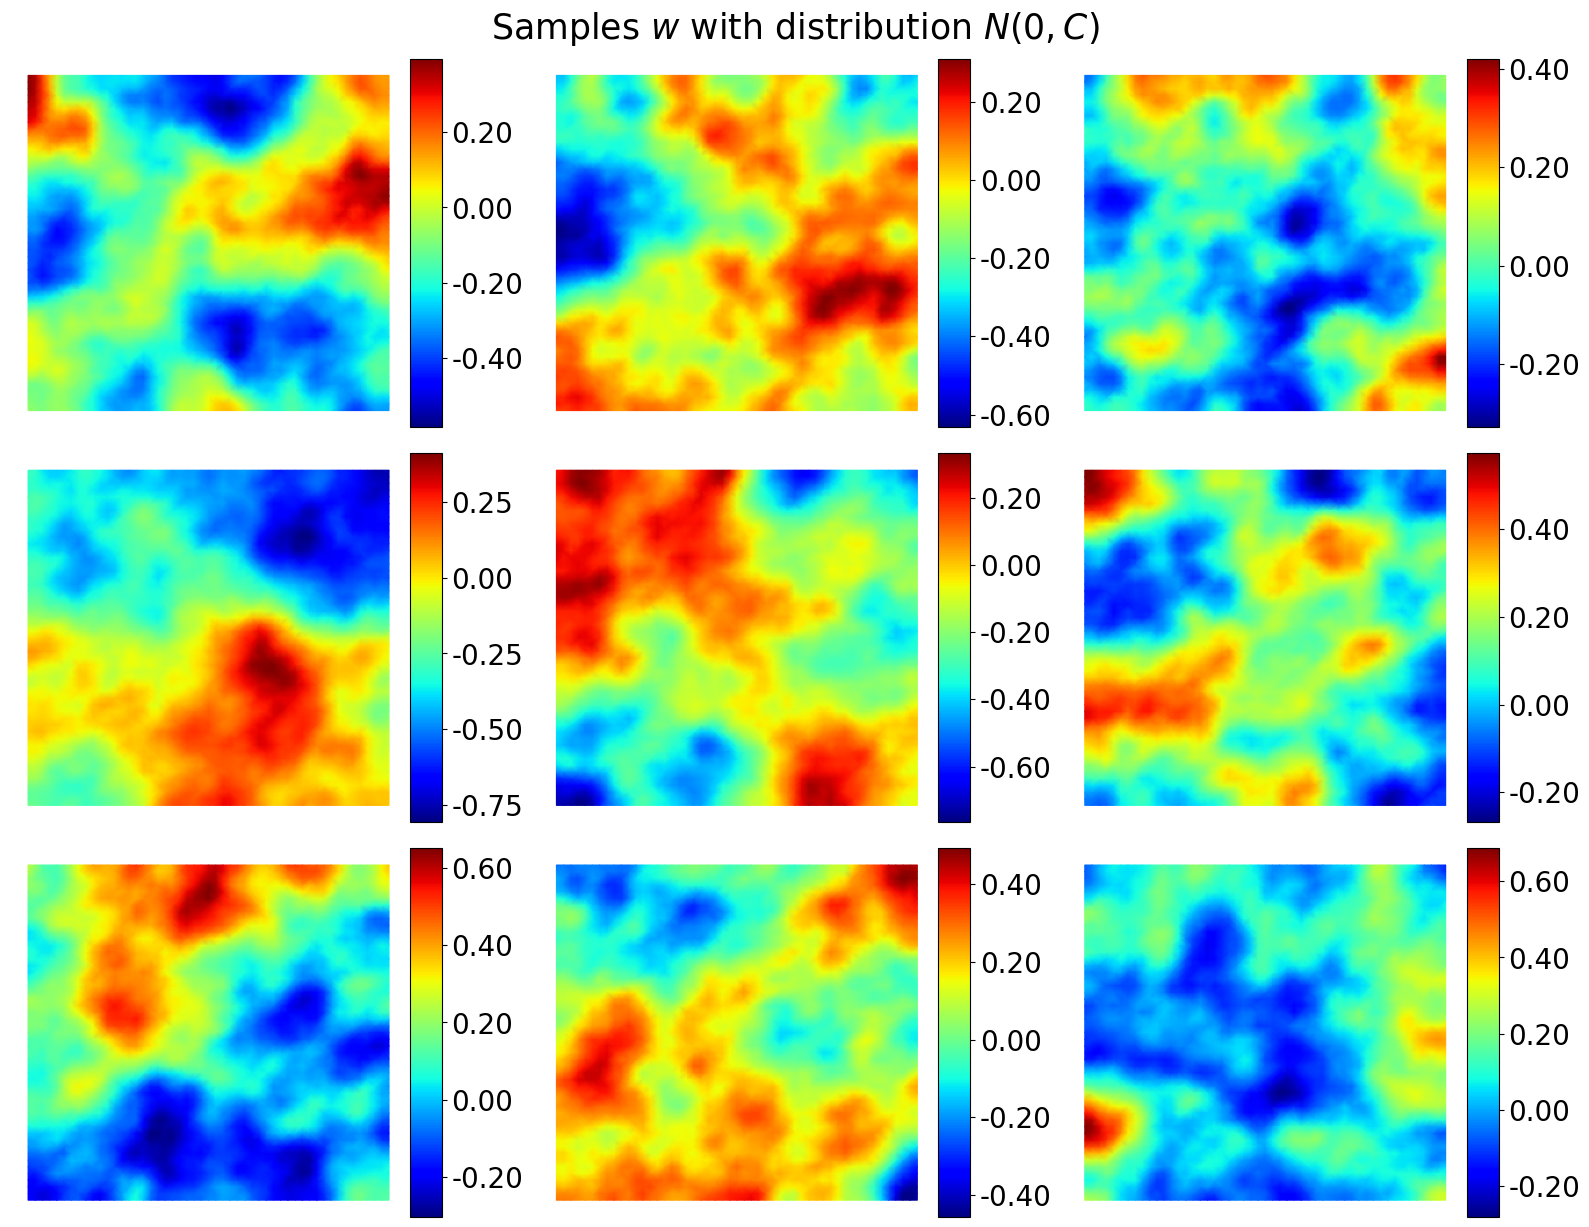

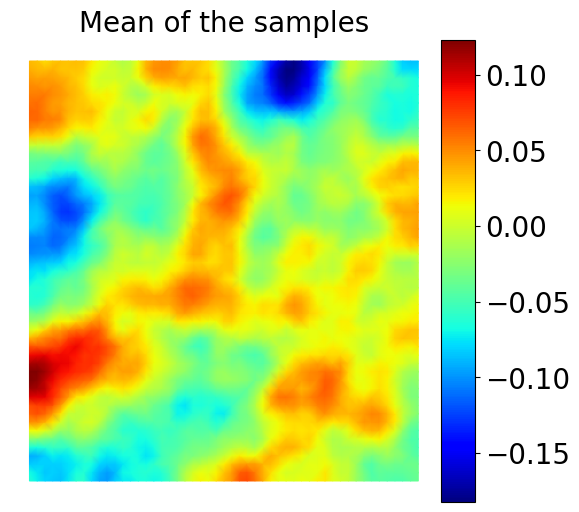

CPU times: user 49.6 s, sys: 111 ms, total: 49.7 s
Wall time: 3.97 s


In [7]:
%%time 

fs = 20
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 12))
stats = []
mvec = []
m = prior_sampler.empty_sample() 
for i in range(rows):
    for j in range(cols):
        # draw a sample
        m, log_prior = prior_sampler(m)

        mvec.append(m)
        stats.append([np.min(m), np.max(m), np.mean(m), np.std(m), log_prior])
        print('Sample: {:2d}, log_prior = {:.2e}, min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}'.format(i*cols + j, log_prior, np.min(m), np.max(m), np.mean(m), np.std(m)))

        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)

        # format cbar ticks
        kfmt = lambda x, pos: "{:.2f}".format(x)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical', format = kfmt)
        axs[i,j].axis('off')

# satistics
stats = np.array(stats)
print('Statistics of all samples')
print('Mean: min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}, log_prior = {:.2e}'.format(np.mean(stats[:,0]), np.mean(stats[:,1]), np.mean(stats[:,2]), np.mean(stats[:,3]), np.mean(stats[:,4])))

fig.tight_layout()
fig.suptitle(r'Samples $w$ with distribution $N(0,C)$', fontsize=1.25*fs, y = 1.025)
plt.savefig(results_dir + 'const_b_prior_samples.png',  bbox_inches='tight')
plt.show()

# compute mean sample field
mvec = np.array(mvec)
m = np.mean(mvec, axis=0)
quick_field_plot(m, prior_sampler.V.mesh().coordinates(), title='Mean of the samples', cmap ='jet')


## Test setting inhomogeneous diffusivity in prior covariance operator

In [8]:
def modify_diffusivity(u, V):
    coords = V.mesh().coordinates()
    xc, yc = 0.4, 0.6
    for i in range(coords.shape[0]):
        dx, dy = coords[i,0] - xc, coords[i,1] - yc
        if dx*dx + dy*dy < 0.25*0.25:
            # modify_ids.append(i)
            u[i] = 0.1
        else:
            u[i] = 10.
    return u

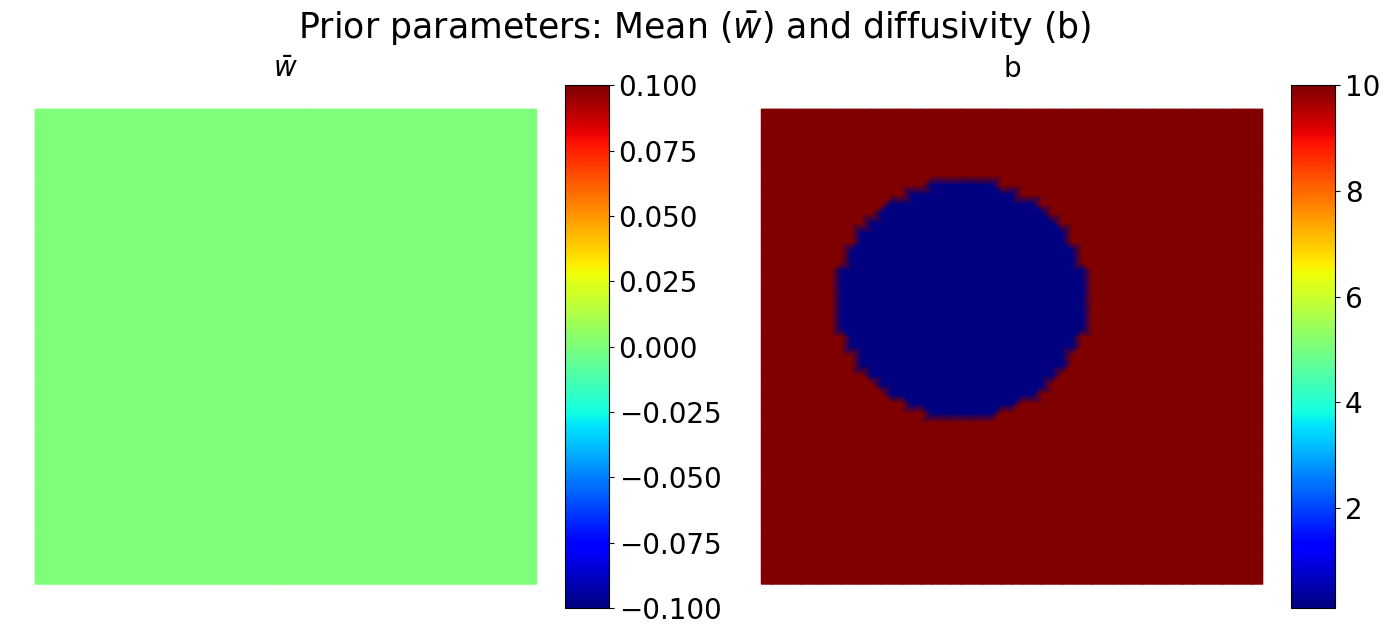

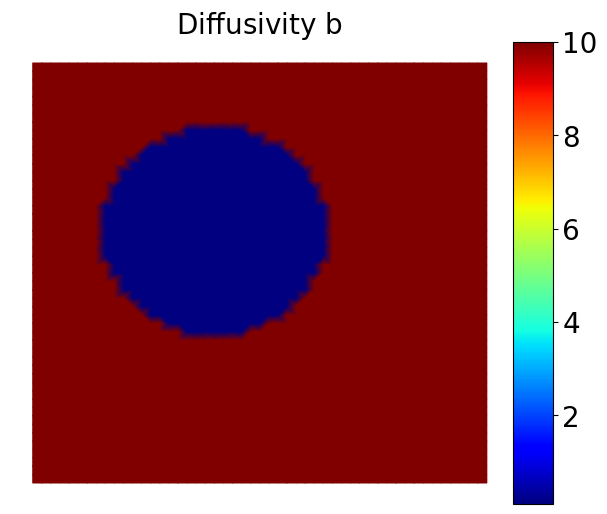

In [9]:
# set diffusion in prior
prior_diffusion = function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
prior_diffusion = modify_diffusivity(prior_diffusion, V)
prior_sampler.set_diffusivity(prior_diffusion)



fs = 20
rows, cols = 1, 2
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))
axs = np.array([axs]) if rows == 1 else axs
stats = []
for i in range(rows):
    for j in range(cols):
        
        m = prior_sampler.mean if j == 0 else function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical')

        axs[i,j].set_title(r'$\bar{w}$' if j == 0 else r'$\mathsf{b}$', fontsize=fs)
        axs[i,j].axis('off')

fig.tight_layout()
fig.suptitle(r'Prior parameters: Mean ($\bar{w}$) and diffusivity ($\mathsf{b}$)', fontsize=1.25*fs, y = 1.05)
plt.savefig(results_dir + 'inhomog_b_prior_parameters.png',  bbox_inches='tight')
plt.show()

# quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), V.mesh().coordinates(), title = 'Prior diffusion', cmap ='jet')

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), prior_sampler.V.mesh().coordinates(), title = r'Diffusivity $\mathsf{b}$', cmap ='jet', figsize=(7, 6), fs = 20, savefilename=results_dir + 'inhomog_b.png')

Sample:  0, log_prior = -7.01e-01, min = -1.39e+00, max = 1.40e+00, mean = -8.87e-02, std = 2.32e-01
Sample:  1, log_prior = -7.07e-01, min = -1.12e+00, max = 1.12e+00, mean = -4.95e-02, std = 1.96e-01
Sample:  2, log_prior = -7.24e-01, min = -1.40e+00, max = 6.21e-01, mean = -1.14e-01, std = 1.70e-01
Sample:  3, log_prior = -7.19e-01, min = -7.45e-01, max = 1.23e+00, mean = -1.02e-02, std = 1.91e-01
Sample:  4, log_prior = -7.07e-01, min = -9.36e-01, max = 1.20e+00, mean = -6.86e-02, std = 1.54e-01
Sample:  5, log_prior = -7.06e-01, min = -9.56e-01, max = 5.87e-01, mean = -6.94e-03, std = 1.63e-01
Sample:  6, log_prior = -7.09e-01, min = -1.78e+00, max = 7.77e-01, mean = -1.57e-03, std = 2.57e-01
Sample:  7, log_prior = -7.04e-01, min = -1.05e+00, max = 1.10e+00, mean = 1.12e-01, std = 1.76e-01
Sample:  8, log_prior = -7.13e-01, min = -9.70e-01, max = 1.11e+00, mean = 1.39e-02, std = 1.48e-01
Statistics of all samples
Mean: min = -1.15e+00, max = 1.02e+00, mean = -2.37e-02, std = 1.87

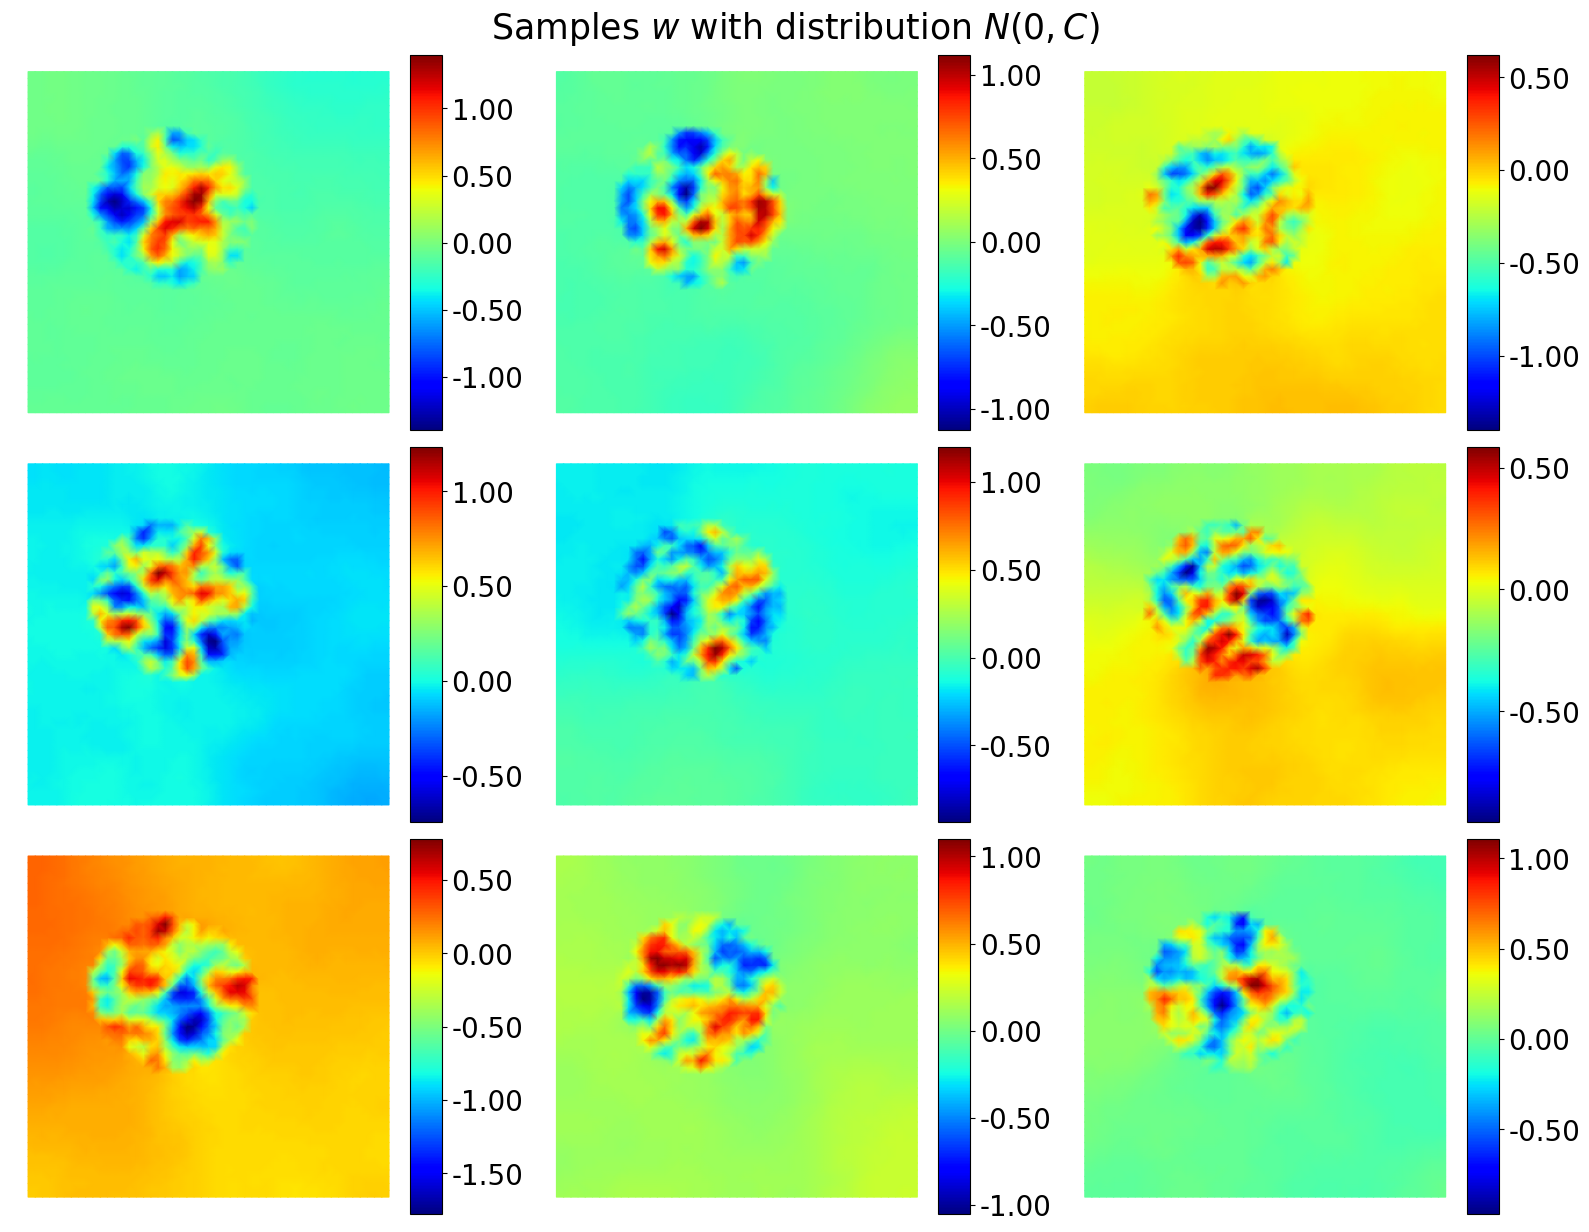

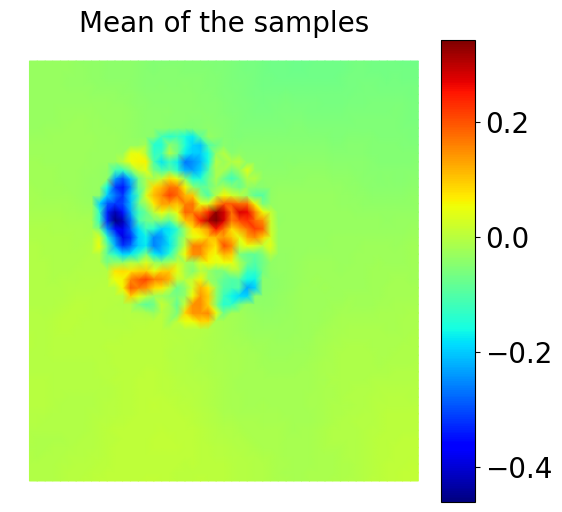

CPU times: user 49.7 s, sys: 107 ms, total: 49.8 s
Wall time: 3.43 s


In [10]:
%%time 

fs = 20
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 12))
stats = []
mvec = []
m = prior_sampler.empty_sample() 
for i in range(rows):
    for j in range(cols):
        # draw a sample
        m, log_prior = prior_sampler(m)

        mvec.append(m)
        stats.append([np.min(m), np.max(m), np.mean(m), np.std(m), log_prior])
        print('Sample: {:2d}, log_prior = {:.2e}, min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}'.format(i*cols + j, log_prior, np.min(m), np.max(m), np.mean(m), np.std(m)))

        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)

        # format cbar ticks
        kfmt = lambda x, pos: "{:.2f}".format(x)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical', format = kfmt)
        axs[i,j].axis('off')

# satistics
stats = np.array(stats)
print('Statistics of all samples')
print('Mean: min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}, log_prior = {:.2e}'.format(np.mean(stats[:,0]), np.mean(stats[:,1]), np.mean(stats[:,2]), np.mean(stats[:,3]), np.mean(stats[:,4])))

fig.tight_layout()
fig.suptitle(r'Samples $w$ with distribution $N(0,C)$', fontsize=1.25*fs, y = 1.025)
plt.savefig(results_dir + 'inhomog_b_prior_samples.png',  bbox_inches='tight')
plt.show()

# compute mean sample field
mvec = np.array(mvec)
m = np.mean(mvec, axis=0)
quick_field_plot(m, prior_sampler.V.mesh().coordinates(), title='Mean of the samples', cmap ='jet')

### Revert diffusivity in prior covariance operator back to constant 1

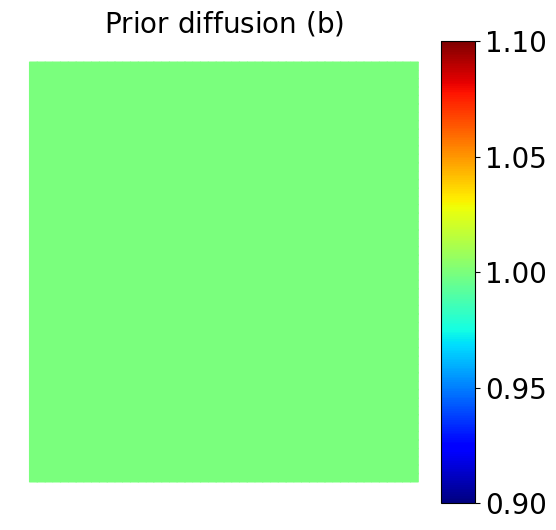

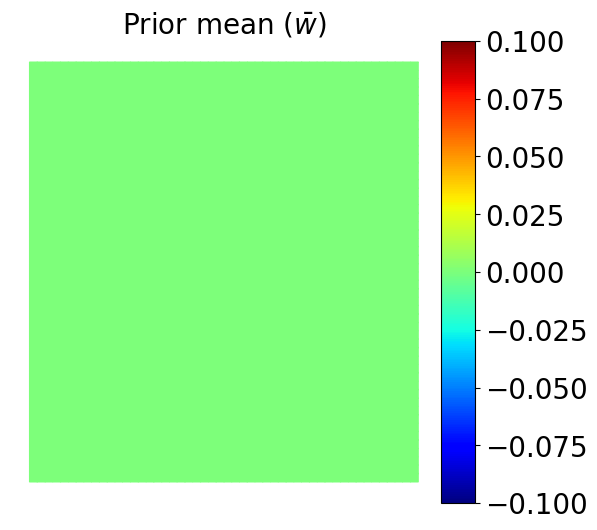

In [11]:
prior_diffusion[:] = 1.
prior_sampler.set_diffusivity(prior_diffusion)

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), V.mesh().coordinates(), title = r'Prior diffusion ($\mathsf{b}$)')

quick_field_plot(prior_sampler.mean, V.mesh().coordinates(), title= r'Prior mean ($\bar{w}$)')


# Try smooth diffusivity

In [12]:
def modify_diffusivity_smooth(u, V):
    xc, yc, r = 0.45, 0.55, 0.3
    n = 2
    vin, vout = 0.2, 1
    a, b = vin, -np.log(vout/vin)
    tol = 1.e-12


    coords = V.mesh().coordinates()
    for i in range(coords.shape[0]):
        x = coords[i]
        # check relative position of point x
        xx, yy = x[0] - xc, x[1] - yc
        # f = (r*r - xx*xx - yy*yy)/(r*r)
        f = np.sqrt(xx*xx + yy*yy) / r
        f = np.power(f, n)
        
        # set values
        if f < 1.+tol:
            # return -0.2*(2*check + 1)
            u[i] = a*np.exp(-b*f*f)
        else:
            u[i] = vout
    return u

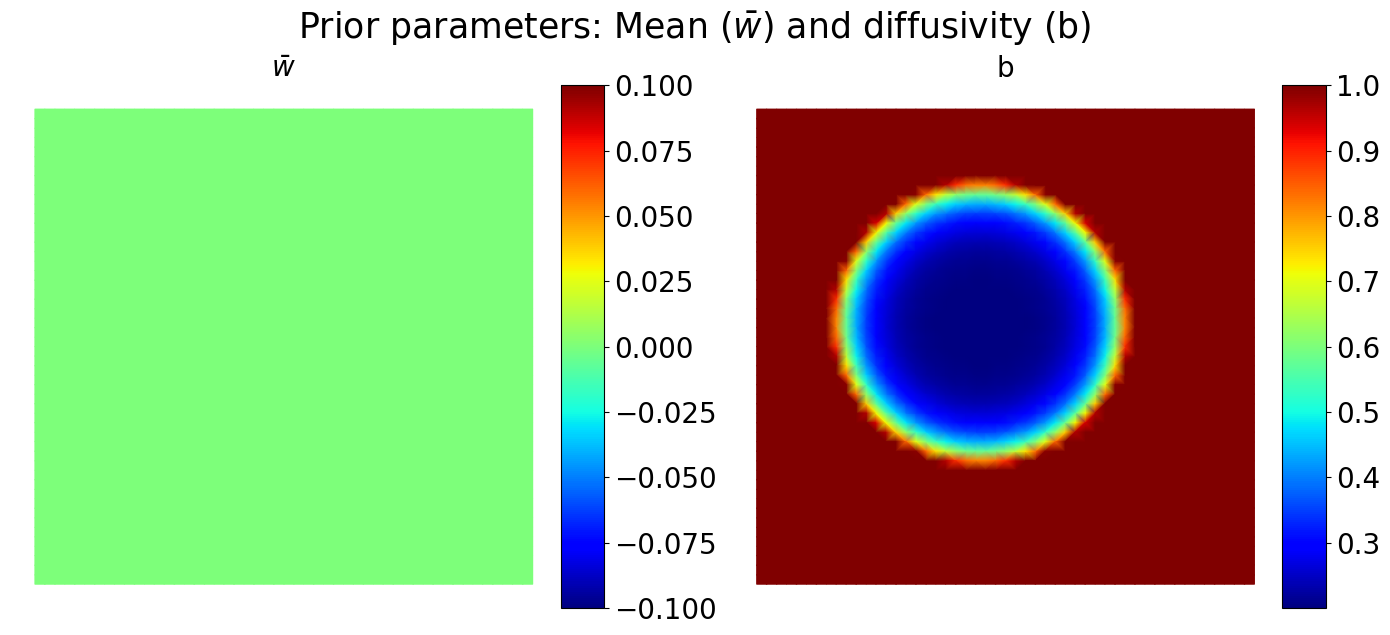

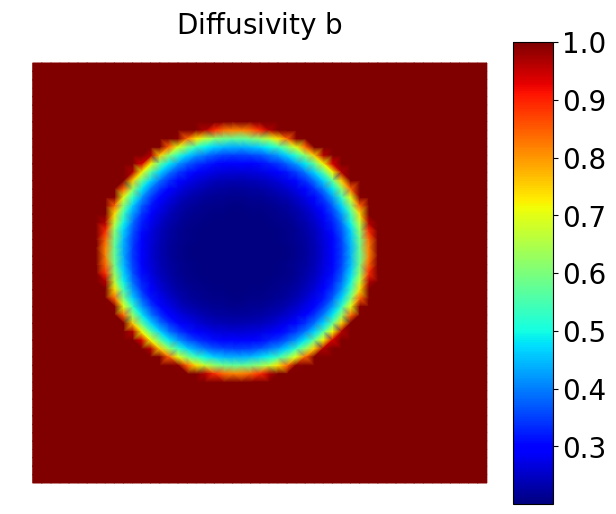

In [13]:
# set diffusion in prior
prior_diffusion = function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
prior_diffusion = modify_diffusivity_smooth(prior_diffusion, V)
prior_sampler.set_diffusivity(prior_diffusion)


fs = 20
rows, cols = 1, 2
fig, axs = plt.subplots(rows, cols, figsize=(14, 6))
axs = np.array([axs]) if rows == 1 else axs
stats = []
for i in range(rows):
    for j in range(cols):
        
        m = prior_sampler.mean if j == 0 else function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V)
        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical')

        axs[i,j].set_title(r'$\bar{w}$' if j == 0 else r'$\mathsf{b}$', fontsize=fs)
        axs[i,j].axis('off')

fig.tight_layout()
fig.suptitle(r'Prior parameters: Mean ($\bar{w}$) and diffusivity ($\mathsf{b}$)', fontsize=1.25*fs, y = 1.05)
plt.savefig(results_dir + 'smooth_b_prior_parameters.png',  bbox_inches='tight')
plt.show()

quick_field_plot(function_to_vertex(prior_sampler.b_fn, None, prior_sampler.V), prior_sampler.V.mesh().coordinates(), title = r'Diffusivity $\mathsf{b}$', cmap ='jet', figsize=(7, 6), fs = 20, savefilename=results_dir + 'smooth_b.png')

# quick_field_plot(prior_sampler.mean.compute_vertex_values(), V.mesh().coordinates(), title='Prior mean', cmap ='jet')

Sample:  0, log_prior = -7.04e-01, min = -1.03e+00, max = 4.51e-01, mean = -2.17e-01, std = 2.21e-01
Sample:  1, log_prior = -7.06e-01, min = -5.64e-01, max = 6.72e-01, mean = 6.40e-02, std = 2.33e-01
Sample:  2, log_prior = -7.07e-01, min = -6.15e-01, max = 7.71e-01, mean = 5.08e-02, std = 2.17e-01
Sample:  3, log_prior = -7.22e-01, min = -8.65e-01, max = 1.01e+00, mean = 1.29e-02, std = 2.67e-01
Sample:  4, log_prior = -6.99e-01, min = -6.18e-01, max = 7.65e-01, mean = 8.79e-03, std = 2.12e-01
Sample:  5, log_prior = -6.88e-01, min = -6.88e-01, max = 7.08e-01, mean = -1.48e-01, std = 2.58e-01
Sample:  6, log_prior = -6.90e-01, min = -7.42e-01, max = 7.51e-01, mean = -7.75e-02, std = 2.28e-01
Sample:  7, log_prior = -7.29e-01, min = -5.69e-01, max = 6.96e-01, mean = -2.74e-02, std = 1.57e-01
Sample:  8, log_prior = -6.96e-01, min = -5.58e-01, max = 6.10e-01, mean = 4.38e-02, std = 1.66e-01
Statistics of all samples
Mean: min = -6.94e-01, max = 7.15e-01, mean = -3.22e-02, std = 2.18e-0

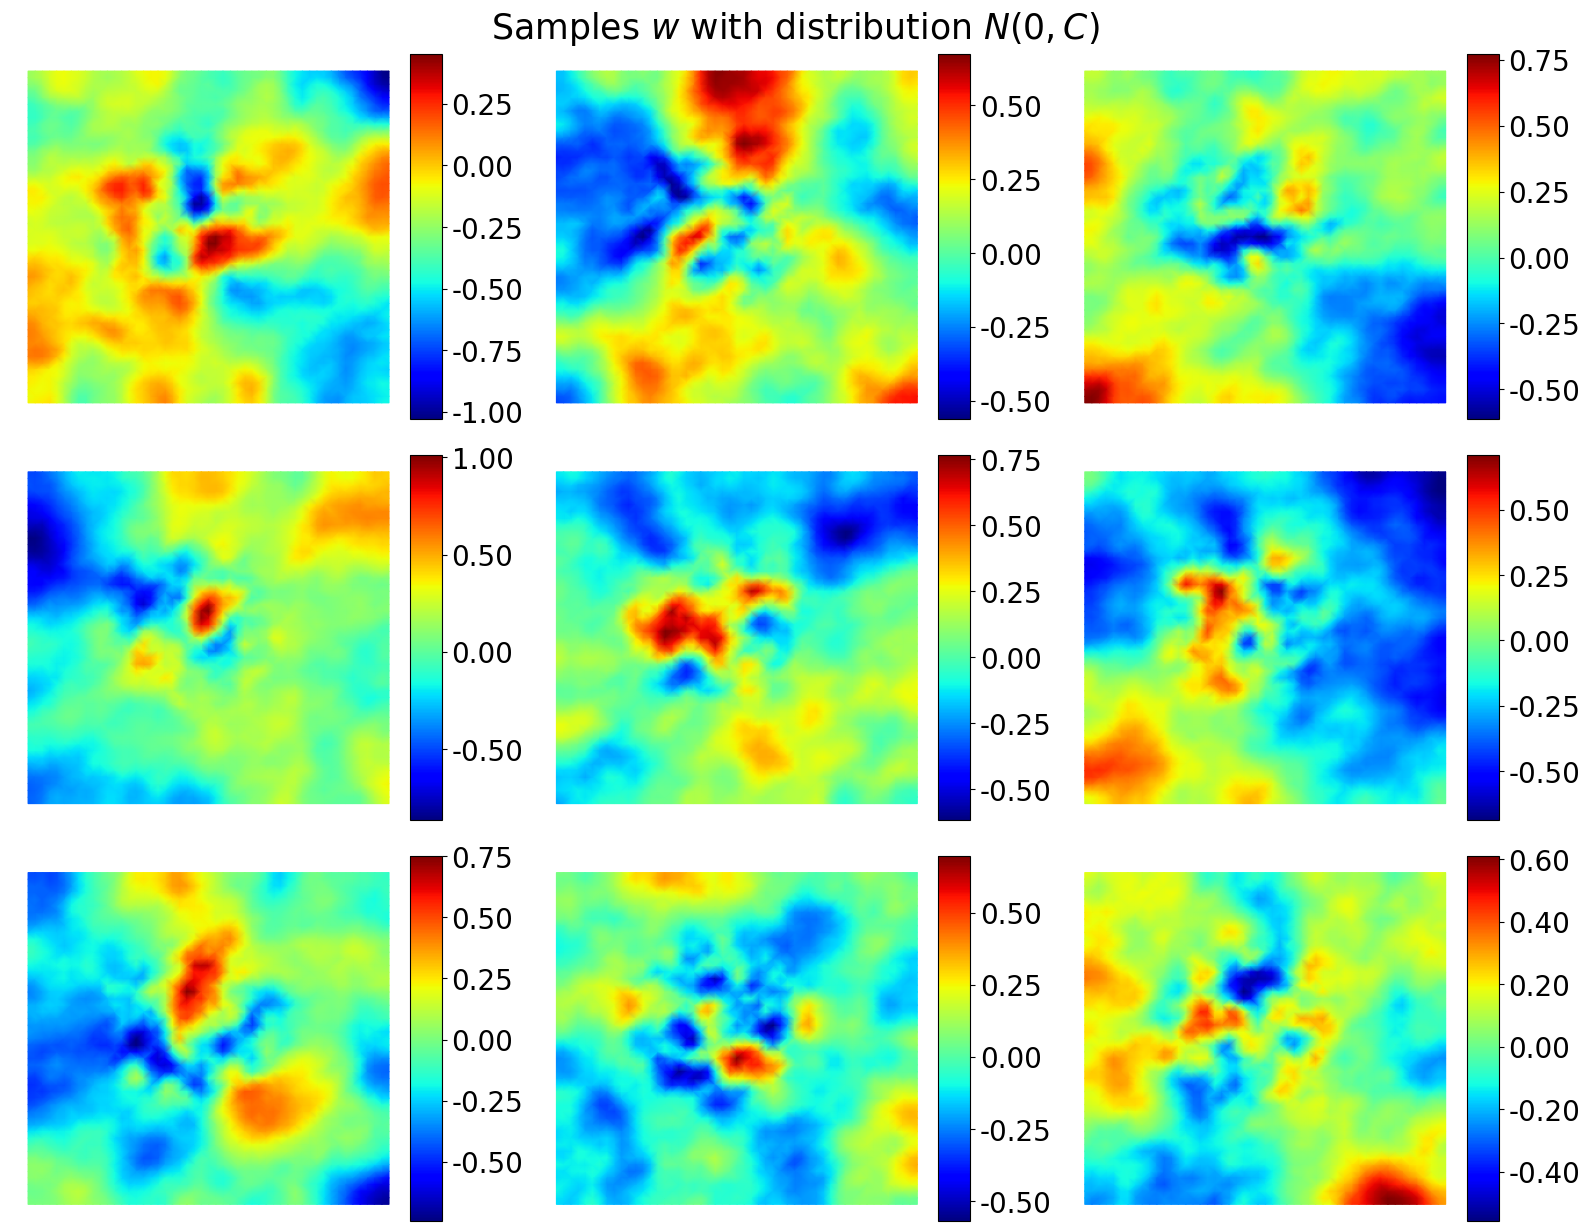

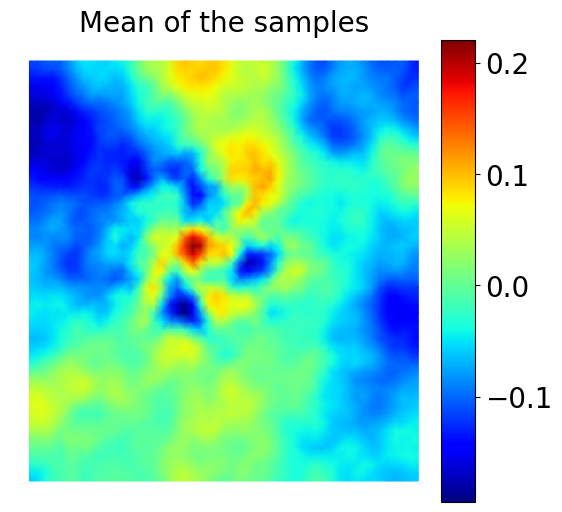

CPU times: user 47.2 s, sys: 91.5 ms, total: 47.3 s
Wall time: 3.89 s


In [14]:
%%time 

fs = 20
rows, cols = 3, 3
fig, axs = plt.subplots(rows, cols, figsize=(16, 12))
stats = []
mvec = []
m = prior_sampler.empty_sample() 
for i in range(rows):
    for j in range(cols):
        # draw a sample
        m, log_prior = prior_sampler(m)

        mvec.append(m)
        stats.append([np.min(m), np.max(m), np.mean(m), np.std(m), log_prior])
        print('Sample: {:2d}, log_prior = {:.2e}, min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}'.format(i*cols + j, log_prior, np.min(m), np.max(m), np.mean(m), np.std(m)))

        # plot
        cbar = field_plot(axs[i,j], \
                  m, \
                  prior_sampler.V.mesh().coordinates(), cmap = 'jet')
        divider = make_axes_locatable(axs[i,j])
        cax = divider.append_axes('right', size='8%', pad=0.03)
        cax.tick_params(labelsize=fs)

        # format cbar ticks
        kfmt = lambda x, pos: "{:.2f}".format(x)
        cbar = fig.colorbar(cbar, cax=cax, orientation='vertical', format = kfmt)
        axs[i,j].axis('off')

# satistics
stats = np.array(stats)
print('Statistics of all samples')
print('Mean: min = {:.2e}, max = {:.2e}, mean = {:.2e}, std = {:.2e}, log_prior = {:.2e}'.format(np.mean(stats[:,0]), np.mean(stats[:,1]), np.mean(stats[:,2]), np.mean(stats[:,3]), np.mean(stats[:,4])))

fig.tight_layout()
fig.suptitle(r'Samples $w$ with distribution $N(0,C)$', fontsize=1.25*fs, y = 1.025)
plt.savefig(results_dir + 'smooth_b_prior_samples.png',  bbox_inches='tight')
plt.show()

# compute mean sample field
mvec = np.array(mvec)
m = np.mean(mvec, axis=0)
quick_field_plot(m, prior_sampler.V.mesh().coordinates(), title='Mean of the samples', cmap ='jet')
